# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 55.51 94.72 71.84 73.35 ... 418.5 380.2 407.6

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.7/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


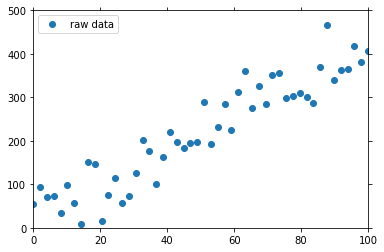

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

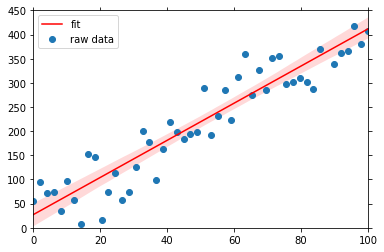

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 27.33223365,  31.21596844,  35.09970323,  38.98343803,
         42.86717282,  46.75090761,  50.6346424 ,  54.5183772 ,
         58.40211199,  62.28584678,  66.16958158,  70.05331637,
         73.93705116,  77.82078595,  81.70452075,  85.58825554,
         89.47199033,  93.35572512,  97.23945992, 101.12319471,
        105.0069295 , 108.89066429, 112.77439909, 116.65813388,
        120.54186867, 124.42560346, 128.30933826, 132.19307305,
        136.07680784, 139.96054264, 143.84427743, 147.72801222,
        151.61174701, 155.49548181, 159.3792166 , 163.26295139,
        167.14668618, 171.03042098, 174.91415577, 178.79789056,
        182.68162535, 186.56536015, 190.44909494, 194.33282973,
        198.21656452, 202.10029932, 205.98403411, 209.8677689 ,
        213.75150369, 217.63523849, 221.51897328, 225.40270807,
        229.28644287, 233.17017766, 237.05391245, 240.93764724,
        244.82138204, 248.70511683, 252.58885162, 256.47258641,
        260.35632121, 264.240056  , 268.12379079, 272.00752558,
        275.89126038, 279.77499517, 283.65872996, 287.54246475,
        291.42619955, 295.30993434, 299.19366913, 303.07740392,
        306.96113872, 310.84487351, 314.7286083 , 318.6123431 ,
        322.49607789, 326.37981268, 330.26354747, 334.14728227,
...
        122.64081796, 126.22689978, 129.87184171, 133.48861435,
        137.18235218, 140.81748265, 144.44967614, 147.99820489,
        151.47531299, 154.97253973, 158.56574472, 162.15894971,
        165.74817382, 169.3453597 , 172.93856469, 176.57615832,
        180.29534619, 184.10459032, 187.79487704, 191.48289415,
        195.27489934, 198.96005627, 202.70747828, 206.52957671,
        210.36771903, 214.12742312, 217.90227158, 221.66578984,
        225.45772875, 229.21854896, 233.11485362, 237.04185721,
        240.86790657, 244.81196336, 248.89601209, 252.78982805,
        256.71275951, 260.68514543, 264.60874511, 268.56894752,
        272.62678729, 276.7133001 , 280.68613316, 284.65426925,
        288.62263494, 292.59304263, 296.6731756 , 300.77816201,
        304.79578215, 308.92916665, 313.09908056, 317.26009656,
        321.34794829, 325.71281615, 330.0262236 , 334.29372416,
        338.65961981, 342.85382043, 346.92302721, 351.29372006,
        355.62905767, 359.84746593, 364.03517499, 368.21313165,
        372.34924947, 376.62556612, 380.79633675, 384.81839082,
        388.91790461, 393.20789256, 397.49095264, 401.49695979,
        405.78720556, 410.07486871, 414.30755515, 418.45176424,
        422.59597334, 426.87486321, 431.1611065 , 435.4944874 ]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      3.8448974446884954
    intercept:  27.3322336492677
    rsquared:   0.8729041922677265

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

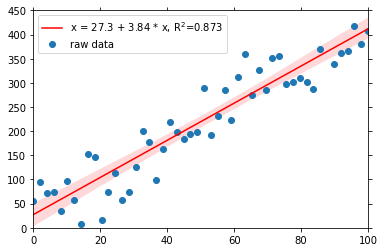

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

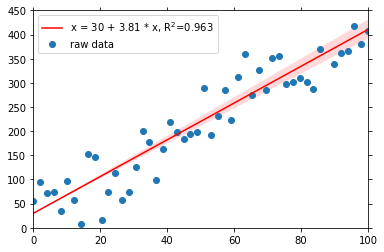

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

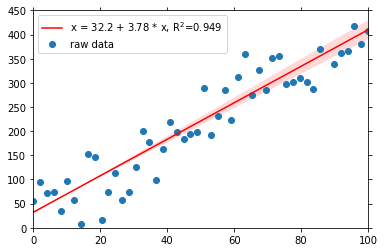

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')